In [1]:
import os
import sys

import dotenv
from pathlib import Path
import yaml

import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
project_dir = str(Path.cwd().parent)
dotenv.load_dotenv(os.path.join(project_dir, '.env'))
config_path = os.path.join(project_dir, 'my_config.yaml')
sys.path.append(project_dir)

In [3]:
def load_config(config_path):
    with open(config_path, 'r') as file:
        return yaml.safe_load(file)
config = load_config(config_path)

In [4]:
from src.data.processing import DataSelect, InitialProcessor, AdvancedProcessor

---

# Load and Slice Data

In [5]:
# raw data
df = pq.read_table(project_dir+'/data/sdo/sensor.parq').to_pandas()

In [6]:
labels = df[['machine_status']]

In [7]:
timestamp = pd.to_datetime(df['timestamp'])

In [8]:
df = df.iloc[:, 1:-1]
df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856


---

# Metadata

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 53 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  220320 non-null  object 
 1   sensor_00  210112 non-null  float64
 2   sensor_01  219951 non-null  float64
 3   sensor_02  220301 non-null  float64
 4   sensor_03  220301 non-null  float64
 5   sensor_04  220301 non-null  float64
 6   sensor_05  220301 non-null  float64
 7   sensor_06  215522 non-null  float64
 8   sensor_07  214869 non-null  float64
 9   sensor_08  215213 non-null  float64
 10  sensor_09  215725 non-null  float64
 11  sensor_10  220301 non-null  float64
 12  sensor_11  220301 non-null  float64
 13  sensor_12  220301 non-null  float64
 14  sensor_13  220301 non-null  float64
 15  sensor_14  220299 non-null  float64
 16  sensor_15  0 non-null       float64
 17  sensor_16  220289 non-null  float64
 18  sensor_17  220274 non-null  float64
 19  sensor_18  220274 non-n

In [10]:
display(df.head())
display(df.tail())
print(df.shape)
print(df.columns)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889


,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,30.208330,38.28125,68.28703,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,29.947920,38.28125,66.84028,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,30.208330,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,30.208332,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856
220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,15.65393,...,30.208332,41.40625,62.78935,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856


(220320, 53)
Index(['timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18',
       'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23',
       'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28',
       'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33',
       'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38',
       'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43',
       'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48',
       'sensor_49', 'sensor_50', 'sensor_51'],
      dtype='object')


---

# Initial Explorations

In [11]:
def nan_counts(df):
    """
    Returns the percent of NaN values in each column
    """    
    n_nan = df.isna().sum()
    as_pct = (n_nan/len(df))*100
    return round(as_pct,2)

In [12]:
def zero_counts(df):
    """
    Returns the percent of zeros in each column
    """
    n_zeros = (df == 0).astype(int).sum(axis=0)
    as_pct = (n_zeros/len(df))*100
    
    return round(as_pct,2)

In [13]:
meta_dict = {
    'isna': nan_counts(df),
    'iszero': zero_counts(df),
    'dtype': df.dtypes,
    'dups': df.timestamp.duplicated().sum(),
    'summary_stats': df.describe(),
    'Time_range': (df.timestamp.min(), df.timestamp.max())
}

# meta_dict['isna']

In [14]:
cols_to_drop = [
    'sensor_15',
    'sensor_50',
]
df.drop(columns=cols_to_drop, inplace=True)

---

# Select Data:
- Graphs can be grouped here, some look very simiilar in structure
- For our purposes, we do not require all the different sensors
- We select 1 from each group, maybe 2 from each group if there is enough variance in structure

,timestamp,sensor_00,sensor_02,sensor_03,sensor_12,sensor_18,sensor_24,sensor_36,sensor_40,sensor_42,sensor_48
0,2018-04-01 00:00:00,2.465394,53.211800,46.310760,31.11716,2.565284,627.6740,195.0655,70.57291,31.770832,157.9861
1,2018-04-01 00:01:00,2.465394,53.211800,46.310760,31.11716,2.565284,627.6740,195.0655,70.57291,31.770832,157.9861
2,2018-04-01 00:02:00,2.444734,53.211800,46.397570,32.08894,2.500062,631.1326,200.9694,69.53125,31.770830,155.9606
3,2018-04-01 00:03:00,2.460474,53.168400,46.397568,31.67221,2.509521,625.4076,193.1689,72.13541,31.510420,155.9606
4,2018-04-01 00:04:00,2.445718,53.211800,46.397568,31.95202,2.604785,627.1830,193.8770,76.82291,31.510420,158.2755
...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,50.520830,43.142361,38.05424,2.499117,611.1745,817.5707,71.61458,30.208330,212.3843
220316,2018-08-31 23:56:00,2.400463,50.564240,43.142361,38.53485,2.618476,609.4917,807.0151,73.17708,29.947920,213.8310
220317,2018-08-31 23:57:00,2.396528,50.520830,43.142361,38.52678,2.620500,610.9940,805.5605,77.08333,30.208330,217.3032
220318,2018-08-31 23:58:00,2.406366,50.520832,43.142361,38.89159,2.514596,605.7183,807.0808,78.64583,30.208332,222.5116


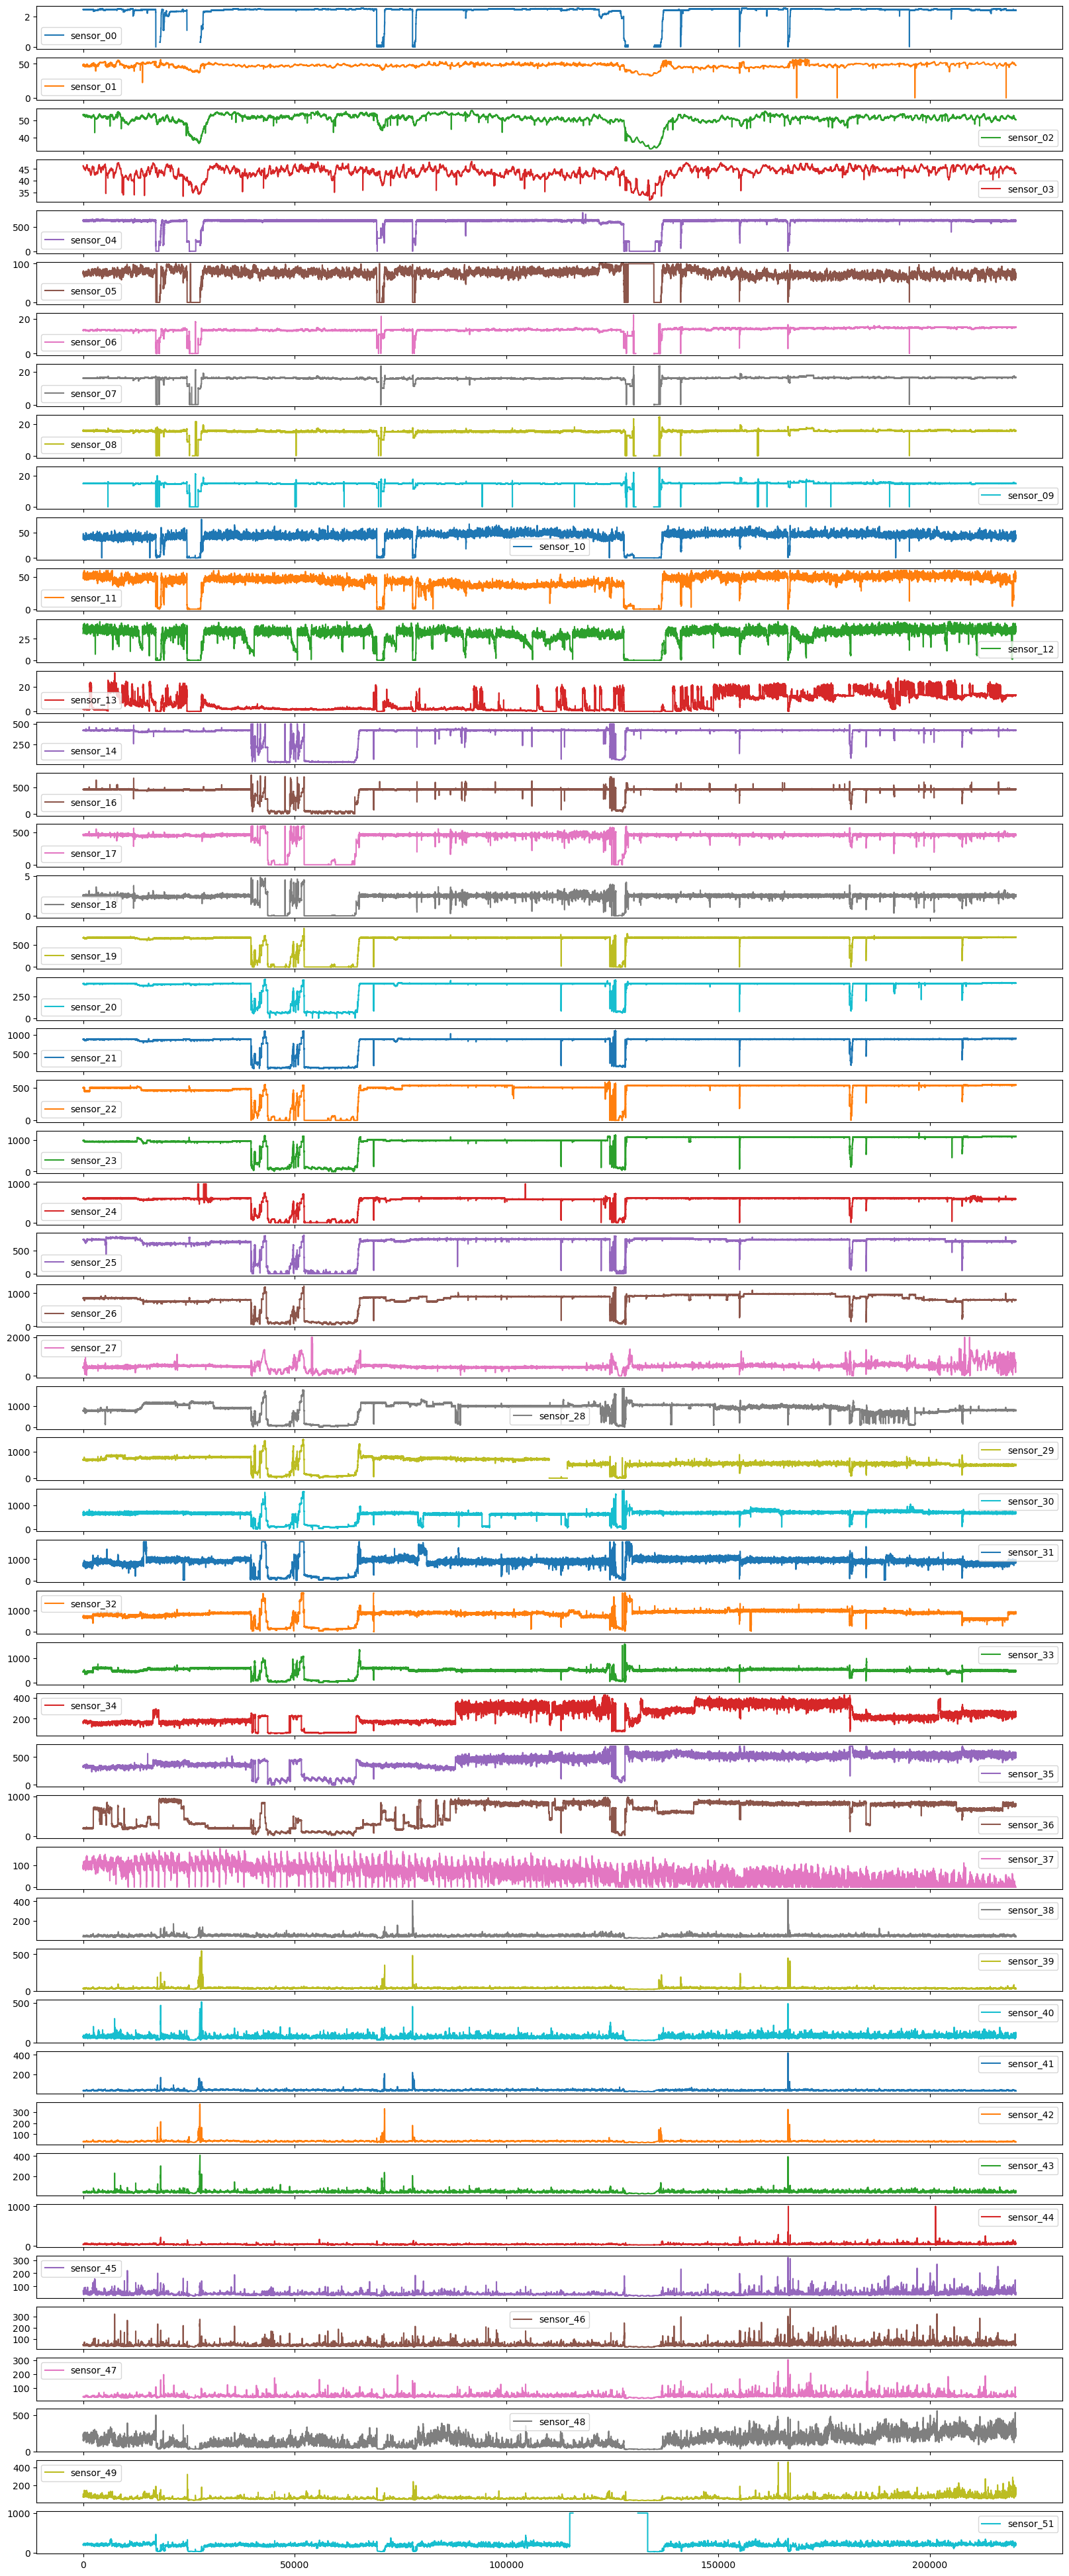

In [15]:
df.iloc[:,1:].plot(subplots=True, sharex=True, figsize=(20,50))

sensors_to_use = [
    'sensor_00',
    'sensor_02',
    'sensor_03',
    'sensor_12',
    'sensor_18',
    'sensor_24',
    'sensor_36',
    'sensor_40',
    'sensor_42',
    'sensor_48'
]

df = df[['timestamp']+sensors_to_use]
df

---

# Apply Processing

In [16]:
initial_processor = InitialProcessor(df)
df = initial_processor.process()
df

c:\Users\delst\workspace\pump-sensor\src\data\processing.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.ffill(inplace=True)
c:\Users\delst\workspace\pump-sensor\src\data\processing.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['timestamp'] = pd.to_datetime(self.df['timestamp'])


,timestamp,sensor_00,sensor_02,sensor_03,sensor_12,sensor_18,sensor_24,sensor_36,sensor_40,sensor_42,sensor_48
0,2018-04-01 00:00:00,2.465394,53.211800,46.310760,31.11716,2.565284,627.6740,195.0655,70.57291,31.770832,157.9861
1,2018-04-01 00:01:00,2.465394,53.211800,46.310760,31.11716,2.565284,627.6740,195.0655,70.57291,31.770832,157.9861
2,2018-04-01 00:02:00,2.444734,53.211800,46.397570,32.08894,2.500062,631.1326,200.9694,69.53125,31.770830,155.9606
3,2018-04-01 00:03:00,2.460474,53.168400,46.397568,31.67221,2.509521,625.4076,193.1689,72.13541,31.510420,155.9606
4,2018-04-01 00:04:00,2.445718,53.211800,46.397568,31.95202,2.604785,627.1830,193.8770,76.82291,31.510420,158.2755
...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,50.520830,43.142361,38.05424,2.499117,611.1745,817.5707,71.61458,30.208330,212.3843
220316,2018-08-31 23:56:00,2.400463,50.564240,43.142361,38.53485,2.618476,609.4917,807.0151,73.17708,29.947920,213.8310
220317,2018-08-31 23:57:00,2.396528,50.520830,43.142361,38.52678,2.620500,610.9940,805.5605,77.08333,30.208330,217.3032
220318,2018-08-31 23:58:00,2.406366,50.520832,43.142361,38.89159,2.514596,605.7183,807.0808,78.64583,30.208332,222.5116


In [17]:
meta_dict = {
    'isna': nan_counts(df),
    'iszero': zero_counts(df),
    'dtype': df.dtypes,
    'dups': df.timestamp.duplicated().sum(),
    'summary_stats': df.describe(),
    'Time_range': (df.timestamp.min(), df.timestamp.max())
}
meta_dict['dups']

0

---

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

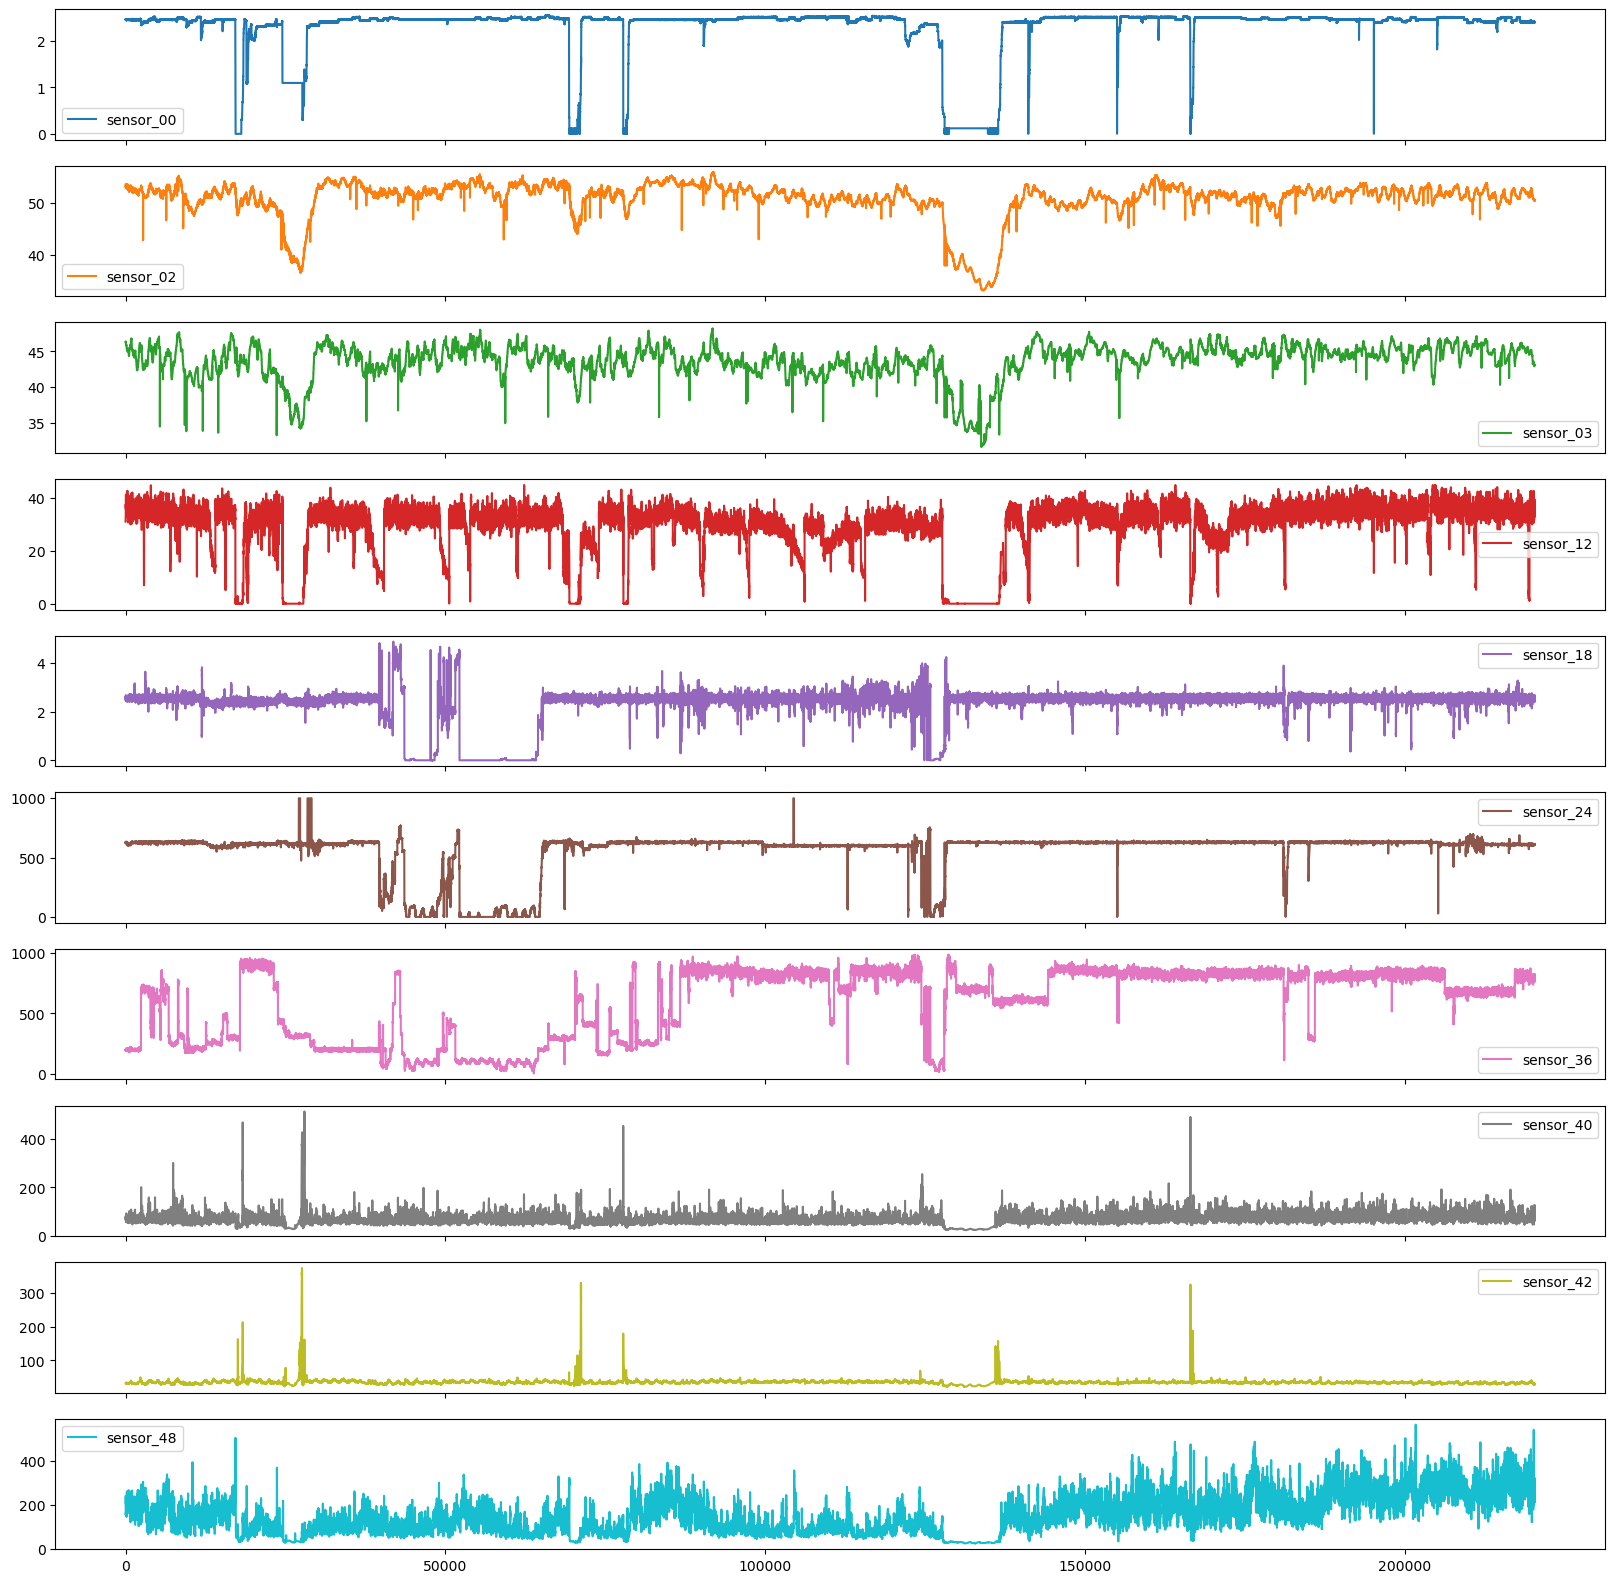

In [18]:
df.iloc[:,1:].plot(subplots=True, sharex=True, figsize=(20,20))

In [19]:
df

,timestamp,sensor_00,sensor_02,sensor_03,sensor_12,sensor_18,sensor_24,sensor_36,sensor_40,sensor_42,sensor_48
0,2018-04-01 00:00:00,2.465394,53.211800,46.310760,31.11716,2.565284,627.6740,195.0655,70.57291,31.770832,157.9861
1,2018-04-01 00:01:00,2.465394,53.211800,46.310760,31.11716,2.565284,627.6740,195.0655,70.57291,31.770832,157.9861
2,2018-04-01 00:02:00,2.444734,53.211800,46.397570,32.08894,2.500062,631.1326,200.9694,69.53125,31.770830,155.9606
3,2018-04-01 00:03:00,2.460474,53.168400,46.397568,31.67221,2.509521,625.4076,193.1689,72.13541,31.510420,155.9606
4,2018-04-01 00:04:00,2.445718,53.211800,46.397568,31.95202,2.604785,627.1830,193.8770,76.82291,31.510420,158.2755
...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,50.520830,43.142361,38.05424,2.499117,611.1745,817.5707,71.61458,30.208330,212.3843
220316,2018-08-31 23:56:00,2.400463,50.564240,43.142361,38.53485,2.618476,609.4917,807.0151,73.17708,29.947920,213.8310
220317,2018-08-31 23:57:00,2.396528,50.520830,43.142361,38.52678,2.620500,610.9940,805.5605,77.08333,30.208330,217.3032
220318,2018-08-31 23:58:00,2.406366,50.520832,43.142361,38.89159,2.514596,605.7183,807.0808,78.64583,30.208332,222.5116


In [20]:
advanced_processor = AdvancedProcessor(df, method='normalize')
df_final = advanced_processor.process()
df_final['timestamp'] = df['timestamp']

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

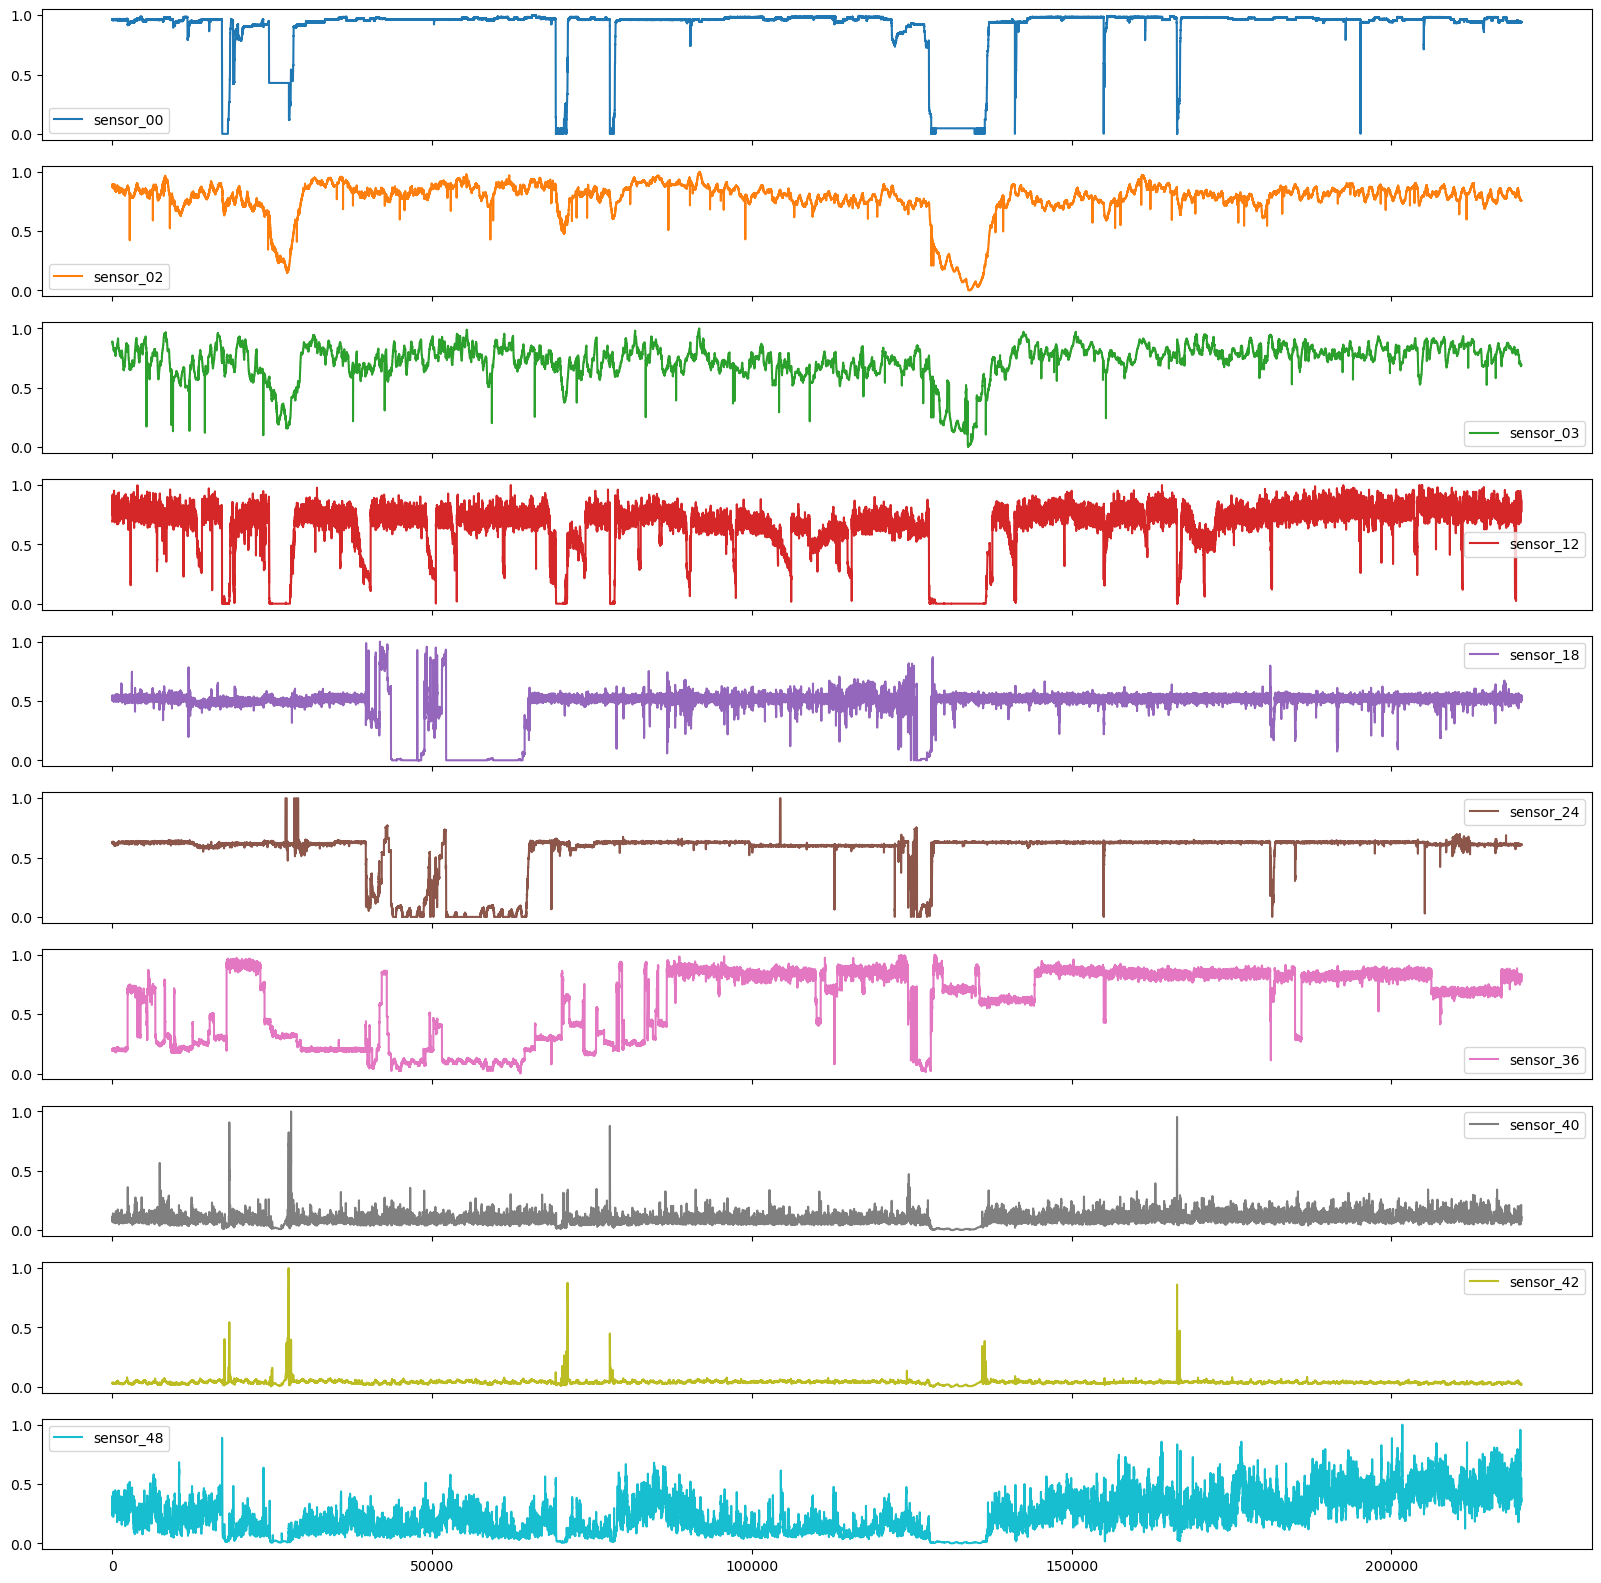

In [21]:
df_final.iloc[:,1:].plot(subplots=True, sharex=True, figsize=(20,20))

---

# Inspect Resultant Data

In [22]:
file_path = os.path.join(project_dir, 'data/processed/processed_sensor.parq')
table = pq.read_table(file_path).to_pandas()
table

,timestamp,sensor_00,sensor_02,sensor_03,sensor_12,sensor_18,sensor_24,sensor_36,sensor_40,sensor_42,sensor_48
0,2018-04-01 00:00:00,0.314712,0.639354,1.057648,0.195856,0.341622,0.391878,-1.375149,0.080907,-0.358937,0.086320
1,2018-04-01 00:01:00,0.314712,0.639354,1.057648,0.195856,0.341622,0.391878,-1.375149,0.080907,-0.358937,0.086320
2,2018-04-01 00:02:00,0.279421,0.639354,1.093535,0.291933,0.256503,0.410850,-1.354748,0.032164,-0.358937,0.061692
3,2018-04-01 00:03:00,0.306308,0.627520,1.093534,0.250732,0.268848,0.379445,-1.381703,0.154020,-0.384321,0.061692
4,2018-04-01 00:04:00,0.281102,0.639354,1.093534,0.278396,0.393174,0.389184,-1.379256,0.373362,-0.384321,0.089839
...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,0.215562,-0.094419,-0.252163,0.881704,0.255270,0.301370,0.775934,0.129649,-0.511243,0.747747
220316,2018-08-31 23:56:00,0.203797,-0.082582,-0.252163,0.929220,0.411042,0.292139,0.739459,0.202763,-0.536627,0.765337
220317,2018-08-31 23:57:00,0.197076,-0.094419,-0.252163,0.928422,0.413683,0.300380,0.734433,0.385548,-0.511243,0.807555
220318,2018-08-31 23:58:00,0.213881,-0.094418,-0.252163,0.964490,0.275471,0.271440,0.739686,0.458662,-0.511243,0.870884


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

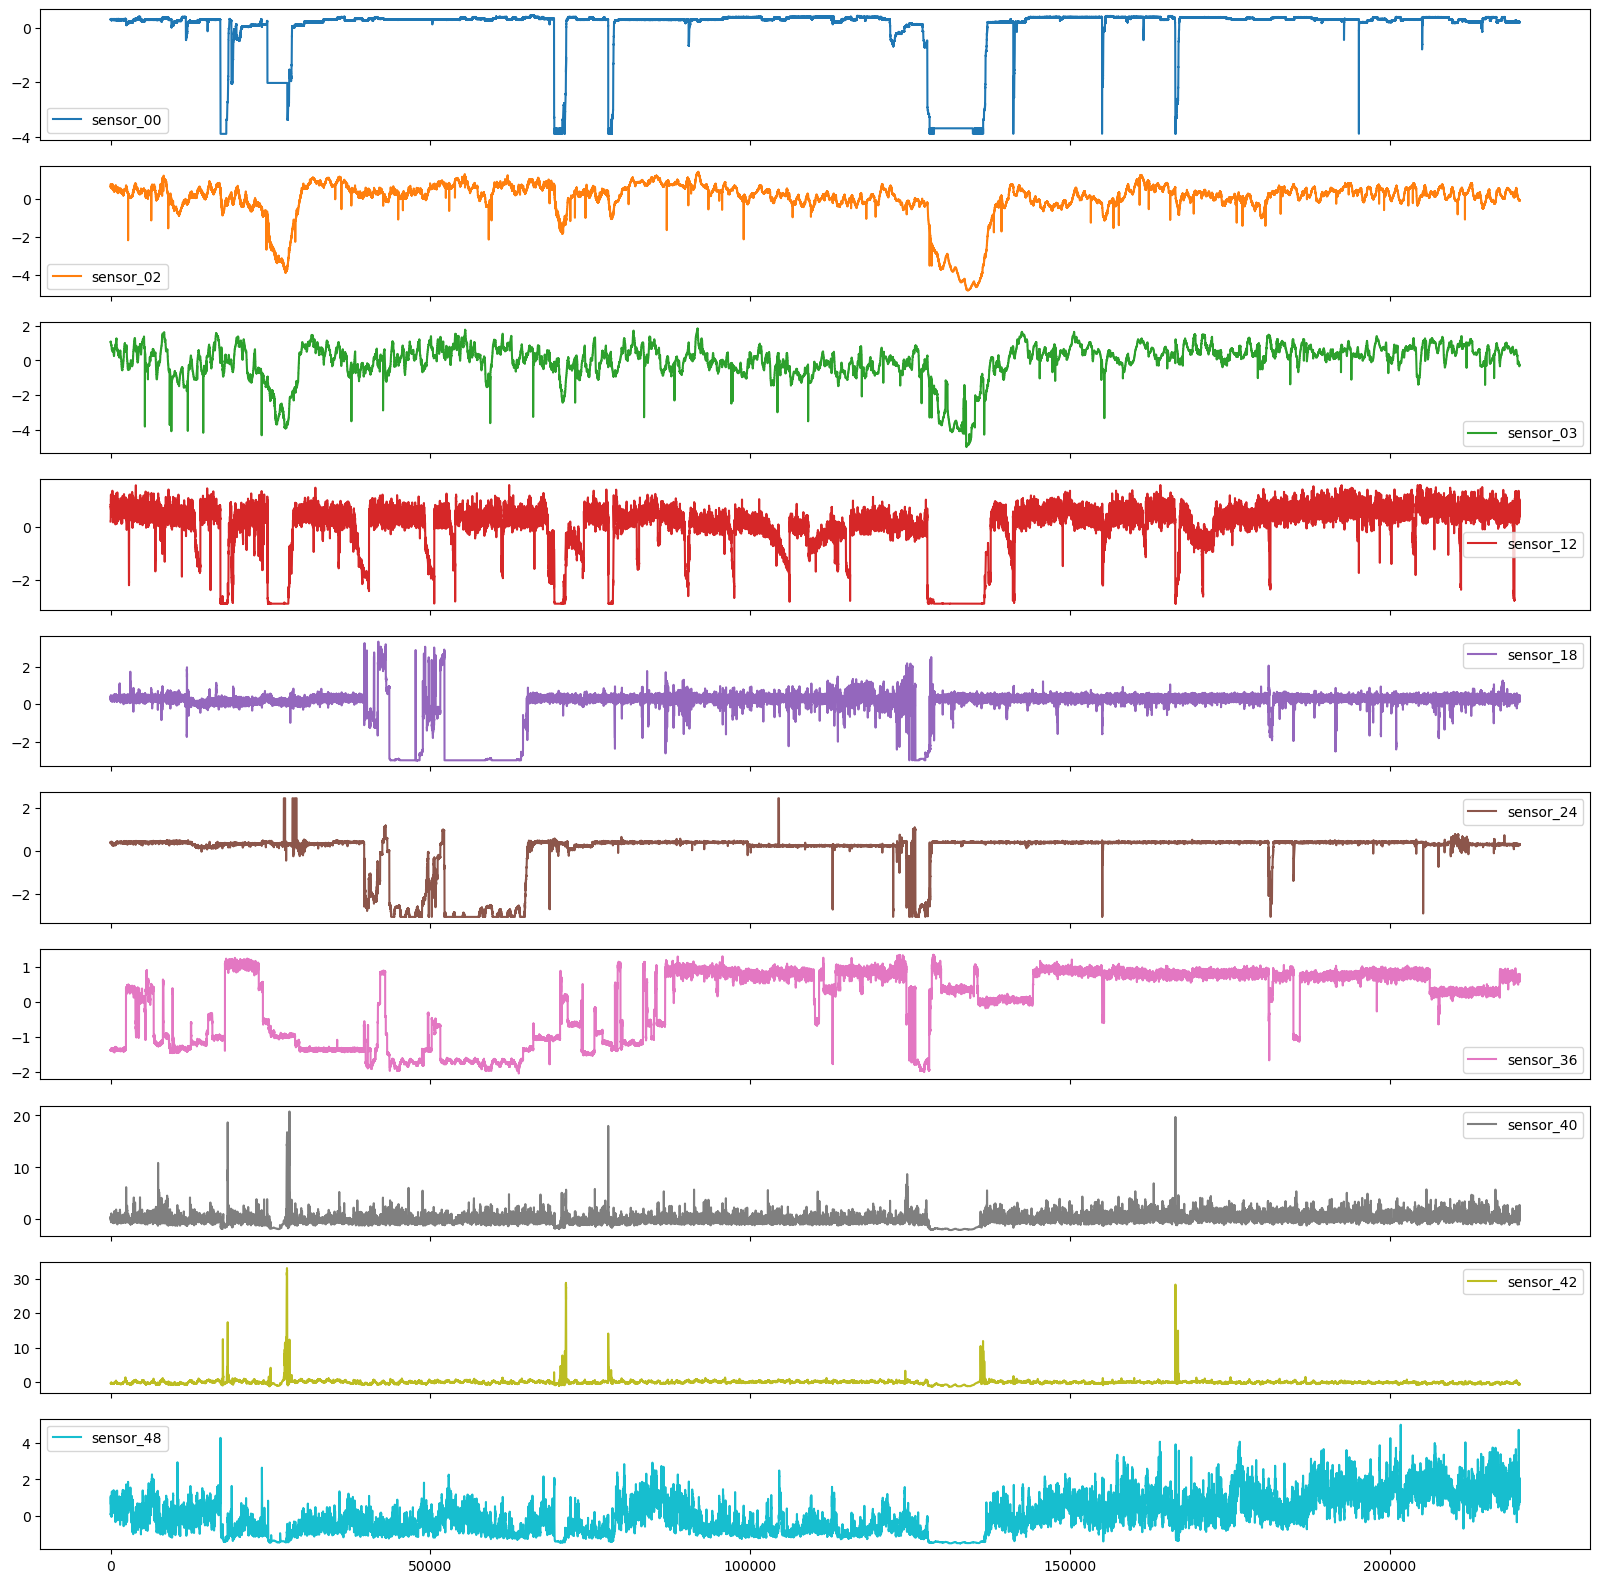

In [24]:
table.iloc[:,1:].plot(subplots=True, sharex=True, figsize=(20,20))